# Como coletar dados com Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedyosef101/2024-olympics-medals-and-economic-status")

print("Path to dataset files:", path)

100%|██████████| 2.08k/2.08k [00:00<00:00, 3.45MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohamedyosef101/2024-olympics-medals-and-economic-status/versions/11


**Passos a seguir:**

  Listar os arquivos na pasta do dataset: Antes de carregar o arquivo CSV, vamos listar os arquivos presentes na pasta para identificar o nome do arquivo que você deseja usar.

In [3]:
import os

# Caminho para o diretório onde os arquivos foram baixados
dataset_dir = "/root/.cache/kagglehub/datasets/mohamedyosef101/2024-olympics-medals-and-economic-status/versions/11"

# Listando os arquivos no diretório
files = os.listdir(dataset_dir)
print("Arquivos no diretório:", files)

Arquivos no diretório: ['olympics-economics.csv']


**Carregar o arquivo CSV no Pandas:** Depois de identificar o arquivo correto, ajuste o caminho e carregue-o. Por exemplo, se o arquivo for 2024_olympics_medals.csv, faça o seguinte:

In [4]:
import pandas as pd

# Ajuste o caminho para o arquivo CSV corretamente
csv_path = os.path.join(dataset_dir, "olympics-economics.csv")

# Lendo o arquivo CSV no Pandas
df = pd.read_csv(csv_path)

# Exibindo as primeiras linhas do DataFrame
print(df.head())

         country country_code  gold  silver  bronze  total       gdp  \
0  United States          USA    40      44      42    126  81695.19   
1          China          CHN    40      27      24     91  12614.06   
2          Japan          JPN    20      12      13     45  33834.39   
3      Australia          AUS    18      19      16     53  64711.77   
4         France          FRA    16      26      22     64  44460.82   

   gdp_year  population  
0      2023       334.9  
1      2023      1410.7  
2      2023       124.5  
3      2023        26.6  
4      2023        68.2  


Explicação

`os.path.join():`

  **Função:** Esta é uma função da biblioteca os do Python que é usada para criar um caminho de diretório de forma segura e correta.
<br>

  **Propósito:** Ao usar os.path.join(), você evita problemas com a formatação de caminhos em diferentes sistemas operacionais (como Windows, macOS e Linux), que podem usar barras (/ ou \) de forma diferente.
<br>

  **Exemplo de uso:** Se dataset_dir é "/root/.cache/kagglehub/datasets/mohamedyosef101/2024-olympics-medals-and-economic-status/versions/11" e o nome do arquivo é "olympics-economics.csv", a função os.path.join() unirá esses dois elementos em um único caminho: "/root/.cache/kagglehub/datasets/mohamedyosef101/2024-olympics-medals-and-economic-status/versions/11/olympics-economics.csv".

# Como coletar dados no API

Aqui vamos pegar exemplos com spotify para a gente ver como funciona o API.

Vou deixar link da documentação para vocês lerem também.

[Documentação Spotify](https://developer.spotify.com/documentation/web-api)

**Instale a Biblioteca spotipy**

Para facilitar a interação com a API do Spotify usando Python, você pode usar a biblioteca spotipy. Instale-a usando o seguinte comando

In [5]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 7.5 MB/s eta 0:00:00


**Autenticação**

Você pode usar a autenticação OAuth para acessar dados da API. Aqui está um exemplo básico de como se autenticar e acessar algumas informações usando spotipy:

In [6]:
# Autenticação com as credenciais diretamente no código
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="SEU_CLIENT_ID", client_secret="SEU_CLIENT_SECRET"))
print('Autenticado com sucesso!')

NameError: name 'spotipy' is not defined

In [43]:
import spotipy
from spotipy.oauth2  import SpotifyClientCredentials
import os

# Configure suas credenciais
os.environ['SPOTIPY_CLIENT_ID'] = 'c3a96d0597844d469abf90d178221bd4'
os.environ['SPOTIPY_CLIENT_SECRET'] = '8ad528ca2b5d4d3fadfa625ba342b7e9'

# Autenticação
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
print('Autenticado com sucesso!')

Autenticado com sucesso!


In [44]:
#informação de Artista

results = sp.search(q='Adrielle Vieira', type='artist')
artist = results['artists']['items'][0]
print(f"Nome: {artist['name']}")
print(f"Popularidade: {artist['popularity']}")
print(f"Gêneros: {', ' .join(artist['genres'])}")

Nome: Adrielle Vieira
Popularidade: 0
Gêneros: 


In [46]:
#Obtendo os álbuns e faixas mais populares

artist_id = artist['id']
top_tracks = sp.artist_top_tracks(artist_id)

for track in top_tracks['tracks']:
  print(f"Música: {track['name']}, Popularidade {track['popularity']}")

Música: Gotham City, Popularidade 0
Música: Kemet Baixada, Popularidade 0
Música: Vagão, Popularidade 0
Música: Clipe, Popularidade 0
Música: Vai Descendo Comigo, Popularidade 0
Música: Juntin, Popularidade 0
Música: Resistência, Popularidade 0
Música: Bença, Vó!, Popularidade 0


In [47]:
def get_artist_id(artist_name):
    results = sp.search(q=artist_name, type='artist')
    if results['artists']['items']:
        return results['artists']['items'][0]['id']
    else:
        return None

def get_artist_top_tracks(artist_name):
    artist_id = get_artist_id(artist_name)
    if artist_id:
        # Obtém as 10 músicas mais populares do artista
        top_tracks = sp.artist_top_tracks(artist_id)
        print(f"Top músicas de {artist_name}:")
        for track in top_tracks['tracks']:
            print(f"Nome: {track['name']}")
            print(f"Popularidade: {track['popularity']}")
            print(f"Duração: {track['duration_ms'] / 1000} segundos")
            print(f"Link: {track['external_urls']['spotify']}")
            print('-' * 30)
    else:
        print(f"Artista '{artist_name}' não encontrado.")

# Exemplo de uso
get_artist_top_tracks('Adrielle Vieira')

Top músicas de Adrielle Vieira:
Nome: Gotham City
Popularidade: 0
Duração: 136.625 segundos
Link: https://open.spotify.com/track/5RBta7CVs91HMq5fkGV8VN
------------------------------
Nome: Kemet Baixada
Popularidade: 0
Duração: 172.137 segundos
Link: https://open.spotify.com/track/77ZWXJ3aBVrbeJGAxJCvUz
------------------------------
Nome: Vagão
Popularidade: 0
Duração: 149.333 segundos
Link: https://open.spotify.com/track/5SXRWUWFHnX4vDqGI8ZSiQ
------------------------------
Nome: Clipe
Popularidade: 0
Duração: 177.214 segundos
Link: https://open.spotify.com/track/5aQcWt95A7JalZQYBZhUEi
------------------------------
Nome: Vai Descendo Comigo
Popularidade: 0
Duração: 163.555 segundos
Link: https://open.spotify.com/track/3U5NyBGyG0Xs38kvBeEykN
------------------------------
Nome: Juntin
Popularidade: 0
Duração: 185.057 segundos
Link: https://open.spotify.com/track/3mdP0jOlzwOjUvrofdEHph
------------------------------
Nome: Resistência
Popularidade: 0
Duração: 125.076 segundos
Link: htt

In [48]:
#Obter Listas de Reprodução Populares

def get_playlists_for_artist(artist_name):
    artist_id = get_artist_id(artist_name)
    if artist_id:
        results = sp.search(q=artist_name, type='playlist')
        print(f"Playlists com músicas de {artist_name}:")
        for playlist in results['playlists']['items']:
            print(f"Nome da Playlist: {playlist['name']}")
            print(f"Total de músicas: {playlist['tracks']['total']}")
            print(f"Link: {playlist['external_urls']['spotify']}")
            print('-' * 30)
    else:
        print(f"Artista '{artist_name}' não encontrado.")

# Exemplo de uso
get_playlists_for_artist('Adrielle Vieira')

Playlists com músicas de Adrielle Vieira:
Nome da Playlist: Adrielle Vieira Radio
Total de músicas: 50
Link: https://open.spotify.com/playlist/37i9dQZF1E4vIlFqUAJe3E
------------------------------
Nome da Playlist: ADRIELY VIEIRA
Total de músicas: 388
Link: https://open.spotify.com/playlist/2FuiFAL5mA62TcNVhCpTYs
------------------------------
Nome da Playlist: Adrielle Vieira Radio
Total de músicas: 50
Link: https://open.spotify.com/playlist/37i9dQZF1E4x6xt71ji0l8
------------------------------
Nome da Playlist: Andréia Vieira
Total de músicas: 524
Link: https://open.spotify.com/playlist/3NjNRFaQiwkra1xKpPVn39
------------------------------
Nome da Playlist: Studio Adrielle Gonçalves
Total de músicas: 258
Link: https://open.spotify.com/playlist/5cip06DCGH9JTVVgS3ONAw
------------------------------
Nome da Playlist: Adrián Vieira
Total de músicas: 376
Link: https://open.spotify.com/playlist/1pvBTshJrbhwa1LLf7ZfsP
------------------------------
Nome da Playlist: Adrielle Lopes Mix
Total

In [49]:
#Obter Estatísticas de Áudio das Músicas

def get_audio_features(track_id):
    try:
        # Obtém as features da música
        audio_features = sp.audio_features(track_id)
        if audio_features:
            features = audio_features[0]
            print(f"Features da música ID {track_id}:")
            print(f"Valência: {features['valence']}")
            print(f"Tempo: {features['tempo']}")
            print(f"Acousticidade: {features['acousticness']}")
            print(f"Instrumentalidade: {features['instrumentalness']}")
            print(f"Dançabilidade: {features['danceability']}")
            print(f"Link: {features['track_href']}")
        else:
            print(f"Nenhuma feature encontrada para o ID {track_id}")
    except Exception as e:
        print(f"Erro ao obter as features: {e}")

# Teste com o ID da música
top_track_id = 'https://open.spotify.com/intl-pt/track/77ZWXJ3aBVrbeJGAxJCvUz?si=15be267f3d7f4692'  # Substitua pelo ID da música correta
get_audio_features(top_track_id)

Features da música ID https://open.spotify.com/intl-pt/track/77ZWXJ3aBVrbeJGAxJCvUz?si=15be267f3d7f4692:
Valência: 0.917
Tempo: 145.068
Acousticidade: 0.478
Instrumentalidade: 0.307
Dançabilidade: 0.867
Link: https://api.spotify.com/v1/tracks/77ZWXJ3aBVrbeJGAxJCvUz


In [50]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Autenticação
client_id = 'c3a96d0597844d469abf90d178221bd4'
client_secret = '8ad528ca2b5d4d3fadfa625ba342b7e9'

credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

def buscar_singles(artist_id):
    try:
        # Obtém os álbuns do artista do tipo 'single'
        albums = sp.artist_albums(artist_id, album_type='single')['items']

        # Armazena informações dos singles
        singles_info = []
        for album in albums:
            # Obtem as faixas do álbum
            tracks = sp.album_tracks(album['id'])['items']
            for track in tracks:
                singles_info.append({
                    'Musica': track['name'],
                    'Album': album['name'],
                    'Popularidade': track['popularity'],
                })
        return singles_info

    except Exception as e:
        print(f"Erro ao buscar singles: {e}")
        return []

# Exemplo de uso
artist_id = '27CgxvcVt6XHurgcoiRc6b'  # Substitua pelo ID do artista
singles = buscar_singles(artist_id)

# Mostrando os resultados
if singles:
    for single in singles:
        print(single)
else:
    print("Nenhum single encontrado ou erro na busca.")


Erro ao buscar singles: 'popularity'
Nenhum single encontrado ou erro na busca.


In [51]:
#API de Artista do Spotify

def get_artist_id(artist_name):
    results = sp.search(q=artist_name, type='artist')
    artists = results['artists']['items']
    if artists:
        return artists[0]['id']  # Retorna o ID do primeiro artista encontrado
    else:
        return None

# Exemplo de uso
artist_name = 'Adrielle Vieira'  # Substitua pelo nome do artista desejado
artist_id = get_artist_id(artist_name)

if artist_id:
    print(f"O ID do artista {artist_name} é: {artist_id}")
else:
    print("Artista não encontrado.")

O ID do artista Adrielle Vieira é: 27CgxvcVt6XHurgcoiRc6b


In [52]:
# Verificar músicas populares
def buscar_singles(artist_id):
    try:
        # Busca álbuns do artista
        albums = sp.artist_albums(artist_id, album_type='single')

        singles_info = []
        for album in albums['items']:
            # Busca as faixas do álbum
            tracks = sp.album_tracks(album['id'])
            for track in tracks['items']:
                # Coletando informações dos singles
                single_info = {
                    'id': track['id'],
                    'name': track['name'],
                    'popularity': track.get('popularity', 'N/A'),  # Usando get para evitar KeyError
                    'album': album['name'],
                    'duration_ms': track['duration_ms'],
                    'artists': [artist['name'] for artist in track['artists']]
                }
                singles_info.append(single_info)

        return singles_info

    except Exception as e:
        print(f"Erro ao buscar singles: {e}")
        return []

# buscar o artista
artist_id = '27CgxvcVt6XHurgcoiRc6b'  # Substitua pelo ID do artista
singles = buscar_singles(artist_id)

if singles:
    for single in singles:
        print(f"Single Name: {single['name']}")
        print(f"ID: {single['id']}")
        print(f"Album: {single['album']}")
        print(f"Duration: {single['duration_ms']} ms")
        print(f"Popularity: {single['popularity']}")
        print(f"Artists: {', '.join(single['artists'])}")
        print("-" * 40)
else:
    print("Nenhum single encontrado ou erro na busca.")

Single Name: Clipe
ID: 5aQcWt95A7JalZQYBZhUEi
Album: Clipe
Duration: 177214 ms
Popularity: N/A
Artists: Adrielle Vieira, Joss Dee
----------------------------------------
Single Name: Kemet Baixada
ID: 77ZWXJ3aBVrbeJGAxJCvUz
Album: Kemet Baixada
Duration: 172137 ms
Popularity: N/A
Artists: Adrielle Vieira, Buzu, Madashi
----------------------------------------
Single Name: Vai Descendo Comigo
ID: 3U5NyBGyG0Xs38kvBeEykN
Album: Vai Descendo Comigo
Duration: 163555 ms
Popularity: N/A
Artists: Adrielle Vieira, DJ Seduty
----------------------------------------
Single Name: Vagão
ID: 5SXRWUWFHnX4vDqGI8ZSiQ
Album: Vagão
Duration: 149333 ms
Popularity: N/A
Artists: Adrielle Vieira, Lastra, #estudeofunk
----------------------------------------
Single Name: Bença, Vó!
ID: 6LAjnaLdq1UagPMG423HHu
Album: Bença, Vó!
Duration: 247720 ms
Popularity: N/A
Artists: Adrielle Vieira, Eufena
----------------------------------------
Single Name: Juntin
ID: 3mdP0jOlzwOjUvrofdEHph
Album: Juntin
Duration: 1850

In [53]:
#Ouvintes Mensais
def obter_ouvintes_mensais(artist_id):
    try:
        # Obter informações do artista
        artist_info = sp.artist(artist_id)

        # Retornar o número de ouvintes mensais
        monthly_listeners = artist_info['followers']['total'] if 'followers' in artist_info else 'N/A'
        return monthly_listeners
    except Exception as e:
        print(f"Erro ao buscar informações: {e}")
        return None

# Exemplo de uso
artist_id = '27CgxvcVt6XHurgcoiRc6b'  # Substitua pelo ID do artista
monthly_listeners = obter_ouvintes_mensais(artist_id)

print(f"Ouvintes mensais: {monthly_listeners}")

Ouvintes mensais: 291


In [54]:
from datetime import datetime

def obter_ouvintes_mensais(artist_id):
    try:
        # Obter informações do artista
        artist_info = sp.artist(artist_id)

        # Extraindo o nome do artista e ouvintes mensais
        artist_name = artist_info['name']
        ouvintes_mensais = artist_info['followers']['total']  # Total de seguidores

        print(f"{datetime.now()} - Ouvintes mensais de {artist_name}: {ouvintes_mensais}")

        return artist_name, ouvintes_mensais
    except Exception as e:
        print(f"Erro ao buscar informações: {e}")
        return None, None

# Substitua pelo ID do artista
artist_id = '27CgxvcVt6XHurgcoiRc6b'

# Coletar os dados
artist_name, ouvintes_mensais = obter_ouvintes_mensais(artist_id)

# Armazenar os dados em um CSV
if ouvintes_mensais is not None:
    # Criar um DataFrame
    data = {
        'Data': [datetime.now()],
        'Artista': [artist_name],
        'Ouvintes Mensais': [ouvintes_mensais]
    }

    df = pd.DataFrame(data)

    # Salvar no arquivo CSV
    df.to_csv('ouvintes_mensais.csv', mode='a', header=False, index=False)

2024-10-17 14:42:27.754343 - Ouvintes mensais de Adrielle Vieira: 291


In [55]:
import matplotlib.pyplot as plt

# Carregar dados do CSV (substitua pelo caminho correto do seu arquivo)
df = pd.read_csv('ouvintes_mensais.csv', names=['Data', 'Artista', 'Ouvintes Mensais'])

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Remover linhas com datas inválidas
df = df.dropna(subset=['Data'])

# Filtrar dados para o ano passado (2023)
ano_passado = df['Data'].dt.year == (pd.to_datetime('today').year - 1)
df_ano_passado = df[ano_passado]

# Verifica se existem dados para o ano passado
if df_ano_passado.empty:
    print("Nenhum dado encontrado para o ano passado.")
else:
    # Agrupar por mês e somar ouvintes mensais
    df_ano_passado['Mês'] = df_ano_passado['Data'].dt.to_period('M')
    monthly_listeners = df_ano_passado.groupby('Mês')['Ouvintes Mensais'].sum().reset_index()

    # Plotar gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_listeners['Mês'].astype(str), monthly_listeners['Ouvintes Mensais'], marker='o')

    # Usar o nome do artista presente no DataFrame se houver dados
    artista_nome = df_ano_passado['Artista'].iloc[0] if not df_ano_passado.empty else "Artista Desconhecido"

    plt.title(f'Ouvintes Mensais de {artista_nome} - Ano Passado')
    plt.xlabel('Meses')
    plt.ylabel('Número de Ouvintes Mensais')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

Nenhum dado encontrado para o ano passado.


In [64]:
import numpy as np

media_popularidade = np.mean(track_popularity)
print(f"A média de popularidade das músicas é: {media_popularidade}")

A média de popularidade das músicas é: 0.0


In [65]:
media_popularidade = sum(track_popularity) / len(track_popularity)
print(f"A média de popularidade das músicas é: {media_popularidade}")

A média de popularidade das músicas é: 0.0


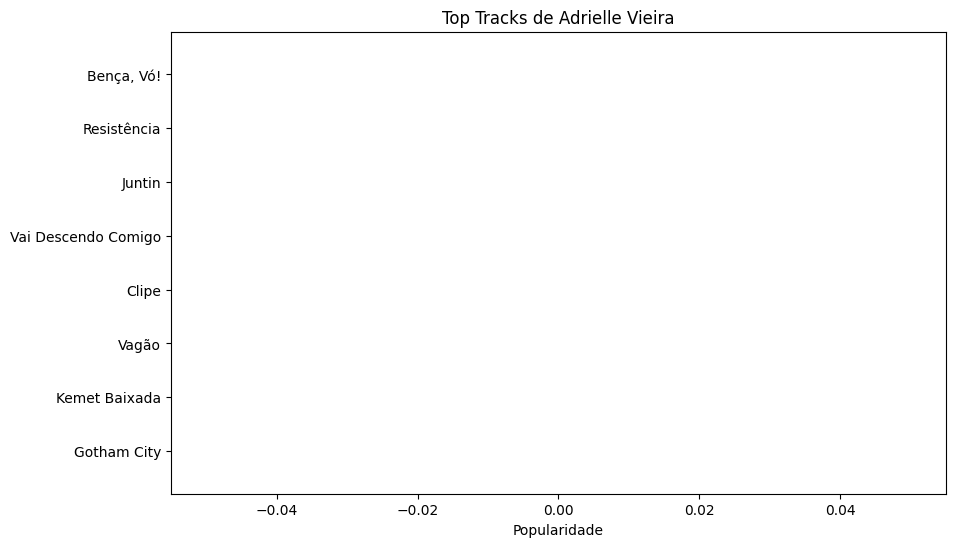

In [63]:
track_names = [track['name'] for track in top_tracks['tracks']]
track_popularity = [track['popularity'] for track in top_tracks['tracks']]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(track_names, track_popularity, color='purple')
plt.xlabel('Popularidade')
plt.title('Top Tracks de ' + artist_name)  # Use o nome do artista que você obteve antes
plt.show()

Nomes das Músicas: ['Gotham City', 'Kemet Baixada', 'Vagão', 'Clipe', 'Vai Descendo Comigo', 'Juntin', 'Resistência', 'Bença, Vó!']
Popularidade das Músicas: [0, 0, 0, 0, 0, 0, 0, 0]


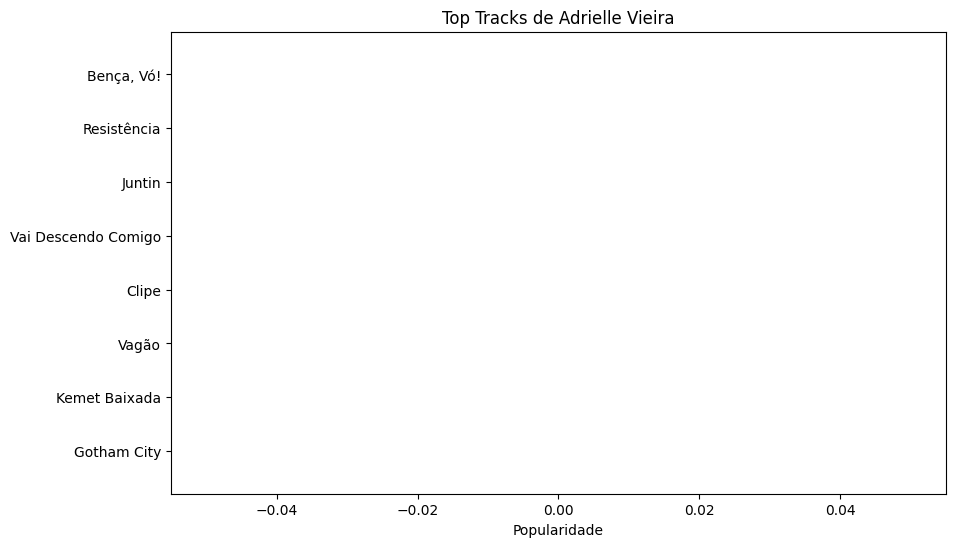

In [57]:
track_names = [track['name'] for track in top_tracks['tracks']]
track_popularity = [track['popularity'] for track in top_tracks['tracks']]

# Verificar se os dados estão corretos
print("Nomes das Músicas:", track_names)
print("Popularidade das Músicas:", track_popularity)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(track_names, track_popularity, color='purple')
plt.xlabel('Popularidade')
plt.title('Top Tracks de ' + artist_name)  # Use o nome do artista que você obteve antes
plt.show()

In [33]:
import requests
import pandas as pd

url = 'https://open.spotify.com/intl-pt/artist/27CgxvcVt6XHurgcoiRc6b?si=DKySXrVhSAaZPPmqbPC1og'
response = requests.get(url)

if response.status_code == 200:
    try:
        data = response.json()  # Tentar carregar como JSON
        df_todos_singles = pd.DataFrame(data)
        print(df_todos_singles.isnull().sum())
    except requests.exceptions.JSONDecodeError:
        print("Erro ao decodificar o JSON. Resposta da API não é válida.")
        print(response.text)  # Ver o que a API está retornando
else:
    print(f"Erro na requisição: {response.status_code}")

Erro ao decodificar o JSON. Resposta da API não é válida.
<!doctype html><html class="mobile-web-player" lang="en" dir="ltr"><head><meta charSet="utf-8"/><title>Adrielle Vieira | Spotify</title><meta property="og:site_name" content="Spotify"/><meta property="fb:app_id" content="174829003346"/><link rel="icon" sizes="32x32" type="image/png" href="https://open.spotifycdn.com/cdn/images/favicon32.b64ecc03.png"/><link rel="icon" sizes="16x16" type="image/png" href="https://open.spotifycdn.com/cdn/images/favicon16.1c487bff.png"/><link rel="icon" href="https://open.spotifycdn.com/cdn/images/favicon.0f31d2ea.ico"/><meta http-equiv="X-UA-Compatible" content="IE=9"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="preload" href="https://encore.scdn.co/fonts/SpotifyMixUI-Regular-cc3b1de388efa4cbca6c75cebc24585e.woff2" as="font" type="font/woff2" crossorigin="anonymous"/><link rel="preload" href="https://encore.scdn.co/fonts/SpotifyMixUITitleVariable-8769ccfde3379b7

In [58]:
df_todos_singles = pd.DataFrame(data)

In [35]:
df_todos_singles.isnull().sum()

,0
Data,0
Artista,0
Ouvintes Mensais,0


In [66]:
#Pegando info do DataFrame
df_todos_singles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              1 non-null      datetime64[ns]
 1   Artista           1 non-null      object        
 2   Ouvintes Mensais  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 152.0+ bytes


In [60]:
print(df_todas_tracks.columns)

RangeIndex(start=0, stop=0, step=1)
